<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

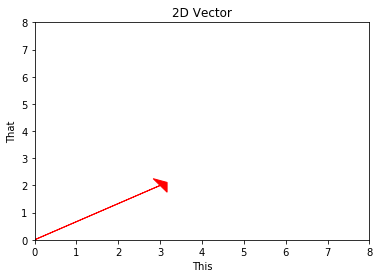

In [2]:
plt.arrow(0,0,3,2, head_length=0.2, head_width=0.6,color='r')
plt.title('2D Vector')
plt.xlim([0,8])
plt.ylim([0,8])
plt.xlabel('This')
plt.ylabel('That')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = np.array([17,-4,-2,1])
print(np.linalg.norm(b))

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3 , 7, -2, 12])
d = np.array([9, -7, 4, 6])
c.dot(d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
e = np.array([
     [7 , 4 , 2],
    [1 ,3 ,-1],
    [2,6 ,-4],
])

In [6]:
e_T = np.transpose([
     [7 , 4 , 2],
    [1 ,3 ,-1],
    [2,6 ,-4],
])
e_T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [7]:
e_I = np.linalg.inv([
     [7 , 4 , 2],
    [1 ,3 ,-1],
    [2,6 ,-4],
])
e_I

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [8]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [9]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [10]:
np.var(df)

customers    84653.061224
snow             7.346939
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No. One is discrete, person to person while the other is continuous represented in inches of snow.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
df = np.array(df)

In [34]:
np.cov(df, ddof= 1)

array([[204938.61764706, 208027.29044118, 209380.40073529,
        205869.97794118],
       [208027.29044118, 215165.43382353, 210011.13970588,
        208593.68382353],
       [209380.40073529, 210011.13970588, 220520.31617647,
        212002.95220588],
       [205869.97794118, 208593.68382353, 212002.95220588,
        230300.18382353]])

In [19]:
df2 = pd.DataFrame(df)
df2.columns = ["customer", "inches"]
covariance = df2.cov()
covariance

,customer,inches
customer,98761.904762,670.238095
inches,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [20]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df = df.drop('Country', axis=1)

In [37]:
df.columns.tolist()
for column in df.columns:
  df[column] = (df[column] - np.mean(df[column])) / df[column].std()
df.sample(3)

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]
 [ 0.18723888  0.15327713 -0.30439545  0.20499304 -0.34010234 -0.05073161
  -0.11338943  0.35064519  0.07333507 -0.32037834  0.33340494  0.2428402
  -0.38616448 -0.14839777 -0.17168328 -0.11736728 -0.24529742]
 [ 0.17623582  0.82376809 -0.05022196  0.07061104 -0.04385325  0.11808584
   0.11366552  0.09372444 -0.14740477  0.28678362 -0.07340366  0.19422013
   0.23032661  0.19451872  0.02465141  0.07685141  0.02798449]]
[1.16157381e+01 4.22811902e+00 1.156142

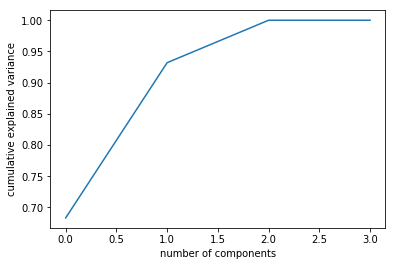

In [38]:
#AUTOPCA
pca = PCA(n_components=4)
print(pca.fit(df))
print()
#PRINCIPLE COMPONENTS
print(pca.components_)
#PCA VARIANCE
print(pca.explained_variance_)
#T the PCA DF
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)
#PLOT FOR ELBOW
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
print(df.shape)
df.head()

(200, 2)


,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [40]:
print(df.dtypes)
df.isna().sum()

x    float64
y    float64
dtype: object


x    0
y    0
dtype: int64

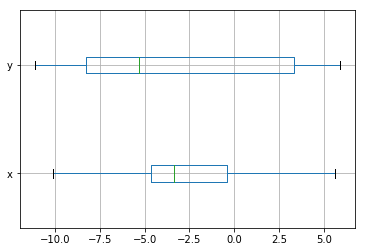

In [41]:
df.boxplot(vert=False, showfliers=False);

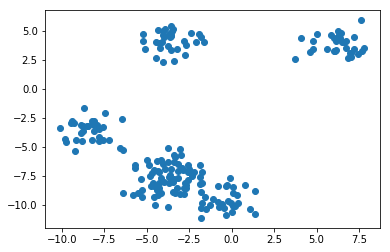

In [50]:
plt.scatter(df.x,df.y);

Data Frame
                x           y
count  200.000000  200.000000
mean    -2.323298   -3.422869
std      4.556513    5.580888
min    -10.118473  -11.095795
25%     -4.619520   -8.246848
50%     -3.373794   -5.307697
75%     -0.427175    3.360028
max      7.807885    5.883054

Number of duplicate rows = 0

Variance -1 ddof

x    20.761811
y    31.146309
dtype: float64


Correlation Matrix
          x         y
x  1.000000  0.366726
y  0.366726  1.000000


Top Absolute Correlations
x  y    0.366726
dtype: float64

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[[ 0.50672697  0.86210659]
 [ 0.86210659 -0.50672697]]
[36.62769487 15.28042483]
original shape:    (200, 2)
transformed shape: (200, 2)


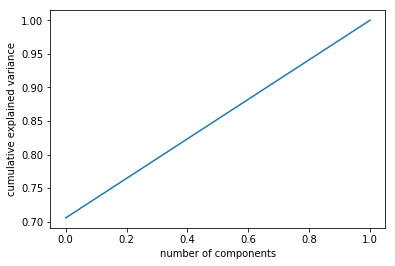

In [43]:
print("Data Frame")
print(df.describe())
print()
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print()
print("Variance -1 ddof")
print()
print(df.var(axis=0,ddof=1).sort_values())
print()
print()
print("Correlation Matrix")
print(df.corr())
print()
print()
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))
print()
#AUTOPCA
pca = PCA(n_components=2)
print(pca.fit(df))
print()
#PRINCIPLE COMPONENTS
print(pca.components_)
#PCA VARIANCE
print(pca.explained_variance_)
#T the PCA DF
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)
#PLOT FOR ELBOW
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

In [0]:
df2 = df
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)

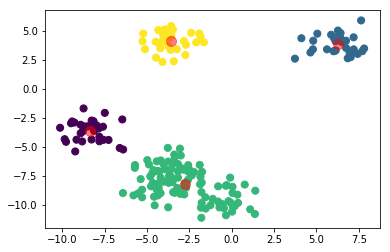

In [55]:
plt.scatter(df2.x, df2.y, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);